In [101]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
# Load the dataset
df = pd.read_csv("./datasets/heart.csv")
df1 = df.copy()  # Create a copy of the dataframe

# Define the columns to be encoded and scaled
cat_cols = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
con_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

# Encoding the categorical columns
df1 = pd.get_dummies(df1, columns=cat_cols, drop_first=True)

# Define the features and target
X = df1.drop(['output'], axis=1)
y = df1['output']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Normalizing the data
scaler = MinMaxScaler()
# X_train_normalized = scaler.fit_transform(X_train)
# X_test_normalized = scaler.transform(X_test)
# X_train_normalized = pd.DataFrame(X_train_normalized, columns=X.columns)
# X_test_normalized = pd.DataFrame(X_test_normalized, columns=X.columns)

X_train_normalized = X_train
X_test_normalized = X_test
# Instantiate and fit the SVM model
svm = SVC(kernel='linear', C=1, random_state=42, probability=True).fit(X_train_normalized, y_train)

# Predicting values
y_pred_svm = svm.predict(X_test_normalized)

# Printing the test accuracy for SVM
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred_svm), f1_score(y_test, y_pred_svm, average='macro'))

# Instantiate and fit the Logistic Regression model
logreg = LogisticRegression(penalty='none',max_iter=2000).fit(X_train_normalized, y_train)

# Predicting values
y_pred_logreg = logreg.predict(X_test_normalized)

# Printing the test accuracy for Logistic Regression
print("The test accuracy score of Logistic Regression is ", accuracy_score(y_test, y_pred_logreg), f1_score(y_test, y_pred_logreg, average='macro'))

# Instantiate and fit the Decision Tree model
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

# Predicting values
y_pred_dt = dt.predict(X_test)

# Printing the test accuracy for Decision Tree
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred_dt), f1_score(y_test, y_pred_dt, average='macro'))

# Instantiate and fit the Random Forest model
rf = RandomForestClassifier().fit(X_train, y_train)

# Predicting values
y_pred_rf = rf.predict(X_test)

# Printing the test accuracy for Random Forest
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf, average='macro'))

# Instantiate the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=50, random_state=42)

# Fit the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Predict values
y_pred_xgb = xgb_classifier.predict(X_test)

# Printing the test accuracy for Gradient Boosting Classifier
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_xgb, average='macro'))

# Instantiate the mlp 
mlp = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)

# Fit the mlp model
mlp.fit(X_train, y_train)

# Predict values
y_pred_mlp = mlp.predict(X_test)

# Printing the test accuracy for mlp Classifier
print("The test accuracy score of MLP Classifier is ", accuracy_score(y_test, y_pred_mlp), f1_score(y_test, y_pred_mlp, average='macro'))

# Instantiate the KNN 
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the mlp model
knn.fit(X_train, y_train)

# Predict values
y_pred_knn = knn.predict(X_test)

# Printing the test accuracy for mlp Classifier
print("The test accuracy score of knn Classifier is ", accuracy_score(y_test, y_pred_mlp), f1_score(y_test, y_pred_knn, average='macro'))
# Calculate permutation importance for SVM
perm_importance_svm = permutation_importance(svm, X_test_normalized, y_test, n_repeats=30, random_state=42)

# Get feature importances
rf_importances = rf.feature_importances_
xgb_importances = xgb_classifier.feature_importances_
logreg_importances = abs(logreg.coef_[0])
current_importance_type = xgb_classifier.get_booster().get_score()
print(current_importance_type)
# Create a DataFrame with feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest': rf_importances,
    'XGBoost': xgb_importances,
    'LogisticRegression': logreg_importances,
    'SVM': perm_importance_svm.importances_mean,
})

# Display feature importances
display(feature_importances)



The test accuracy score of SVM is  0.8524590163934426 0.8524590163934426
The test accuracy score of Logistic Regression is  0.8688524590163934 0.8685344827586207
The test accuracy score of Decision Tree is  0.7868852459016393 0.7866559052999731
The test accuracy score of Random Forest is  0.8524590163934426 0.8524590163934426
The test accuracy score of Gradient Boosting Classifier is  0.8360655737704918 0.8360215053763441
The test accuracy score of MLP Classifier is  0.819672131147541 0.817910447761194
The test accuracy score of knn Classifier is  0.819672131147541 0.6557377049180328
{'age': 75.0, 'trtbps': 63.0, 'chol': 74.0, 'thalachh': 56.0, 'oldpeak': 49.0, 'sex_1': 24.0, 'exng_1': 17.0, 'caa_1': 26.0, 'caa_2': 16.0, 'caa_3': 5.0, 'cp_1': 2.0, 'cp_2': 15.0, 'cp_3': 6.0, 'fbs_1': 6.0, 'restecg_1': 12.0, 'slp_1': 10.0, 'slp_2': 15.0, 'thall_1': 2.0, 'thall_2': 13.0, 'thall_3': 11.0}


,Feature,RandomForest,XGBoost,LogisticRegression,SVM
0,age,0.095877,0.025709,0.026423,-1.038251e-02
1,trtbps,0.074909,0.022472,0.027272,-1.366120e-02
2,chol,0.082234,0.024680,0.002798,-3.278689e-03
3,thalachh,0.111034,0.021236,0.015321,-4.371585e-03
4,oldpeak,0.125585,0.055354,0.527267,-6.557377e-03
5,sex_1,0.032760,0.032049,2.010827,2.841530e-02
6,exng_1,0.067125,0.058808,1.048914,1.311475e-02
7,caa_1,0.040193,0.049876,2.804424,2.185792e-02
8,caa_2,0.024713,0.041973,3.947595,5.245902e-02
9,caa_3,0.015516,0.078349,2.278360,8.196721e-03


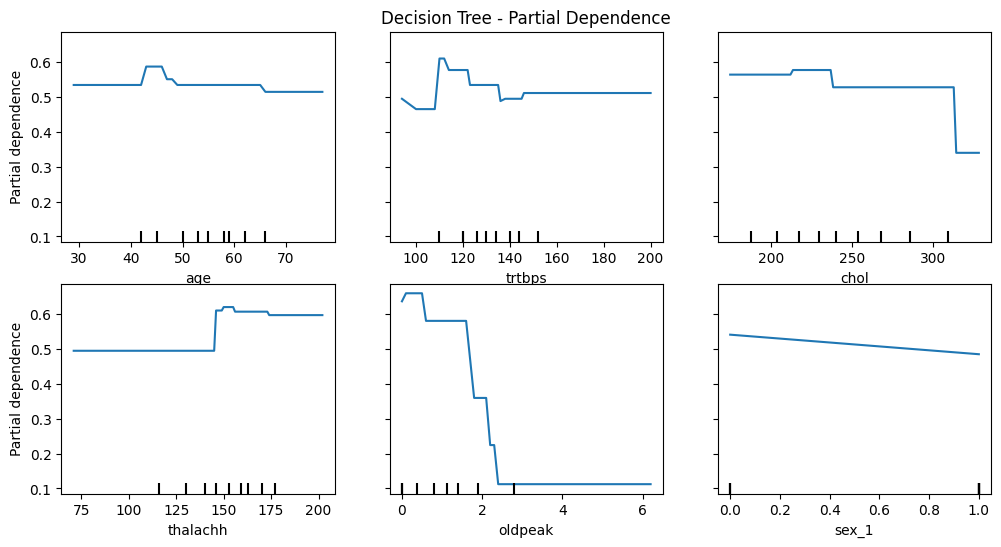

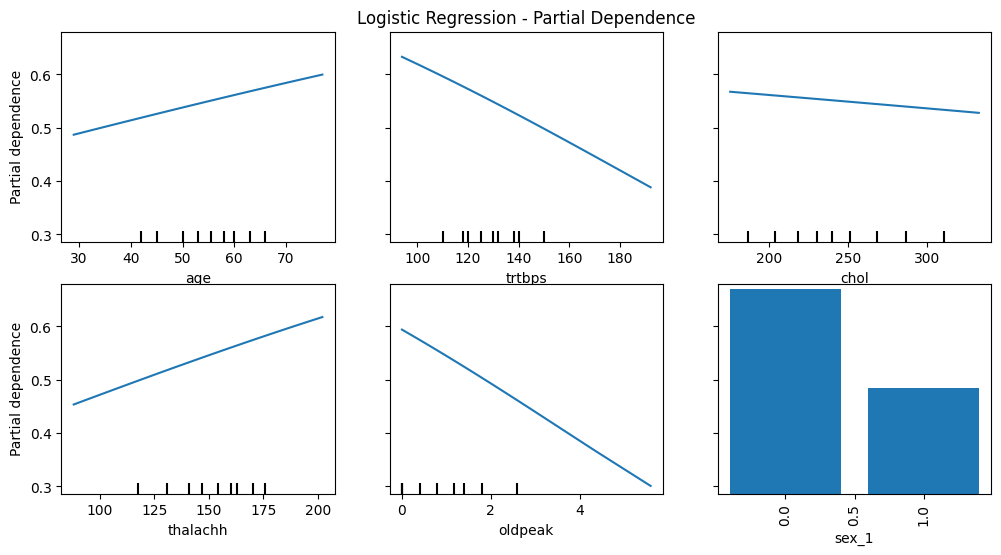

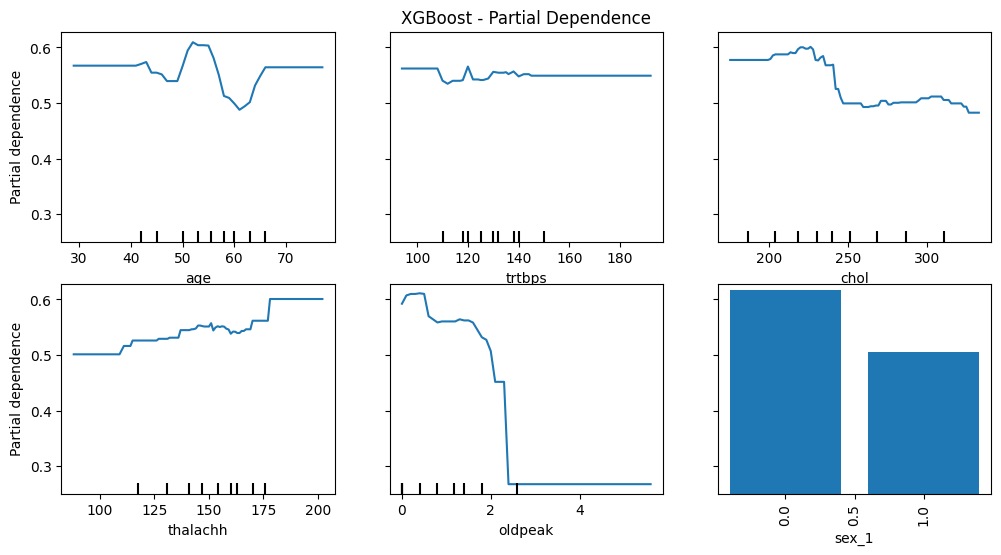

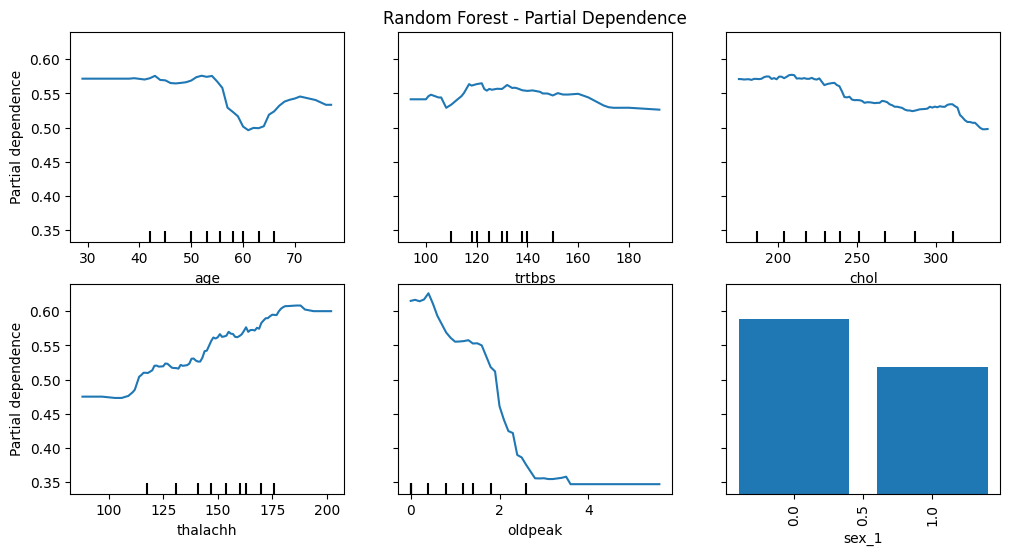

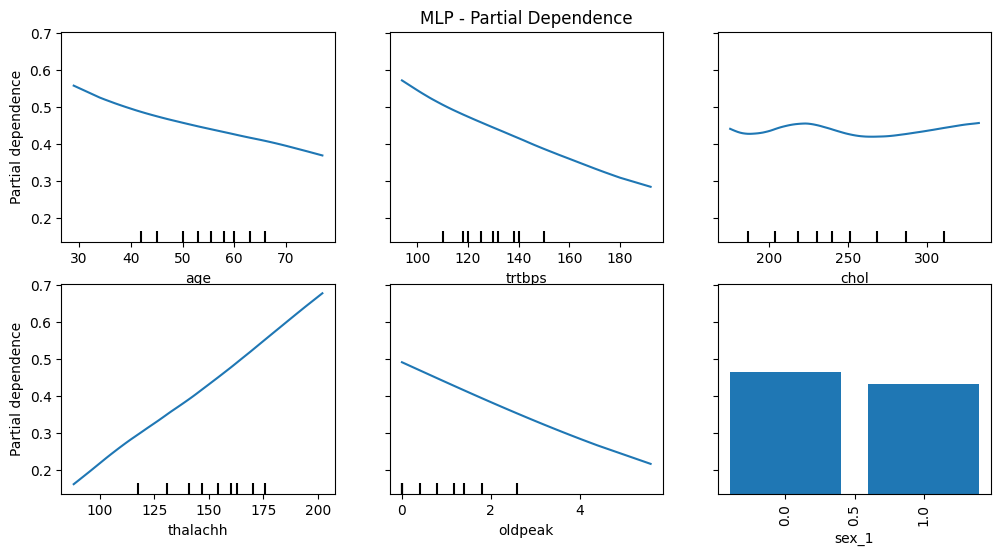

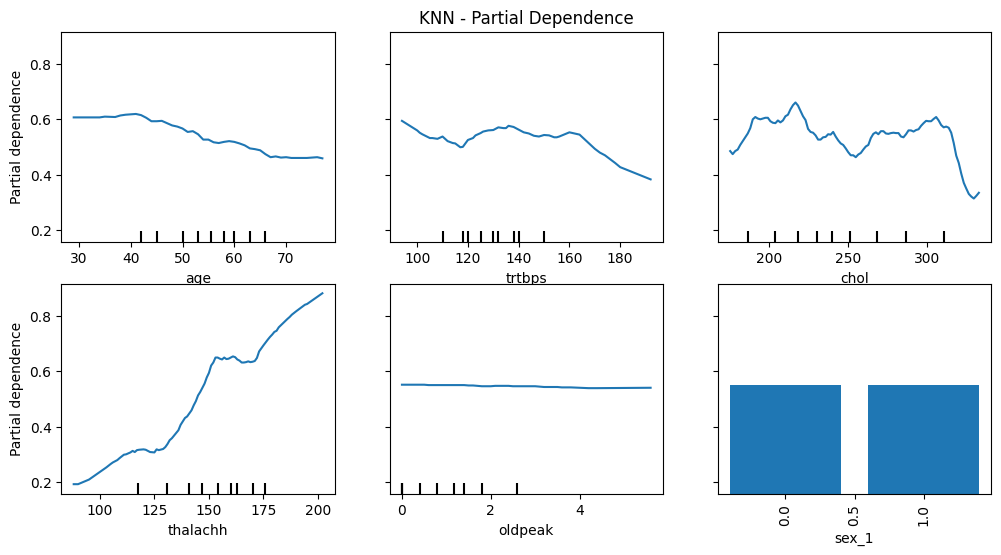

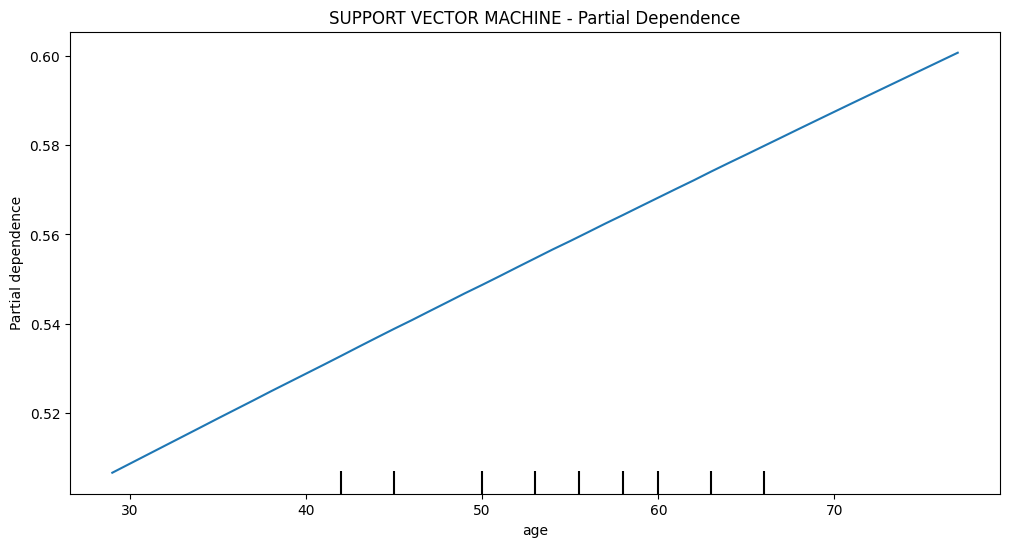

In [105]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
feature_names = [0, 1,2, 3,4,5]

# Decision Tree
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree - Partial Dependence")
PartialDependenceDisplay.from_estimator(dt, X, features=feature_names, ax=ax)
plt.show()

# Logistic Regression
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Logistic Regression - Partial Dependence")
PartialDependenceDisplay.from_estimator(logreg, X_train, features=feature_names,categorical_features= ["sex_1"], ax=ax)
plt.show()

# SVM - Partial Dependence doesn't directly apply to SVM; consider other visualization methods
# SVM doesn't inherently support partial dependence plots as decision tree-based models do.

# XGBoost
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("XGBoost - Partial Dependence")
PartialDependenceDisplay.from_estimator(xgb_classifier, X_train, features=feature_names, ax=ax,categorical_features= ["sex_1"])
plt.show()

# Random Forest
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Random Forest - Partial Dependence")
PartialDependenceDisplay.from_estimator(rf, X_train, features=feature_names, ax=ax,categorical_features= ["sex_1"])
plt.show()
# MULTI LAYER PERCEPTRON
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("MLP - Partial Dependence")
PartialDependenceDisplay.from_estimator(mlp, X_train, features=feature_names, ax=ax,categorical_features= ["sex_1"])
plt.show()
# KNN
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("KNN - Partial Dependence")
PartialDependenceDisplay.from_estimator(knn, X_train, features=feature_names, ax=ax,categorical_features= ["sex_1"])
plt.show()
# SVM
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("SUPPORT VECTOR MACHINE - Partial Dependence")
PartialDependenceDisplay.from_estimator(svm, X_train, features=['age'], ax=ax,categorical_features= ["sex_1"])
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp = PartialDependenceDisplay.from_estimator(
    rf, X, ["age"], ax=ax, line_kw={"color": "red"}
)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tree_disp.plot(ax=ax1, line_kw={"label": "Decision Tree"})
mlp_disp.plot(ax=ax2, line_kw={"label": "Multi-layer Perceptron", "color": "red"})
ax1.legend()
ax2.legend()